# Agenda

1. Importing the data and performing data quality checks
2. Data Exploration and Feature Engineering
3. Model Building

## 1. Importing the data and performing data quality checks

In [47]:
import pandas as pd

In [48]:
repo_path = "/workspaces/myfolder/energy-churn-prediction"

raw_client_df = pd.read_csv(f"{repo_path}/data/client_data_raw.csv")
raw_client_df.head(10)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0
5,1aa498825382410b098937d65c4ec26d,usilxuppasemubllopkaafesmlibmsdf,8302,0,1998,2011-12-09,2016-12-09,2015-11-01,2015-12-10,796.94,...,f,181.21,33.12,33.12,1,118.89,4,lxidpiddsbxsbosboudacockeimpuepw,13.200,1
6,7ab4bf4878d8f7661dfc20e9b8e18011,foosdfpfkusacimwkcsosbicdxkicaua,45097,0,0,2011-12-02,2016-12-02,2011-12-02,2015-12-03,8069.28,...,f,0.00,4.04,4.04,1,346.63,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,1
7,01495c955be7ec5e7f3203406785aae0,foosdfpfkusacimwkcsosbicdxkicaua,29552,0,1260,2010-04-21,2016-04-21,2010-04-21,2015-04-22,864.73,...,f,70.63,53.92,53.92,1,100.09,6,lxidpiddsbxsbosboudacockeimpuepw,26.400,0
8,f53a254b1115634330c12c7fdbf7958a,usilxuppasemubllopkaafesmlibmsdf,2962,0,0,2011-09-23,2016-09-23,2011-09-23,2015-09-25,444.38,...,f,0.00,12.82,12.82,1,42.59,4,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
9,10c1b2f97a2d2a6f10299dc213d1a370,lmkebamcaaclubfxadlmueccxoimlema,26064,0,2188,2010-05-04,2016-05-04,2015-04-29,2015-05-05,2738.10,...,f,219.59,33.42,33.42,1,329.60,6,lxidpiddsbxsbosboudacockeimpuepw,31.500,0


In [49]:
print(raw_client_df.dtypes)

id                                 object
channel_sales                      object
cons_12m                            int64
cons_gas_12m                        int64
cons_last_month                     int64
date_activ                         object
date_end                           object
date_modif_prod                    object
date_renewal                       object
forecast_cons_12m                 float64
forecast_cons_year                  int64
forecast_discount_energy          float64
forecast_meter_rent_12m           float64
forecast_price_energy_off_peak    float64
forecast_price_energy_peak        float64
forecast_price_pow_off_peak       float64
has_gas                            object
imp_cons                          float64
margin_gross_pow_ele              float64
margin_net_pow_ele                float64
nb_prod_act                         int64
net_margin                        float64
num_years_antig                     int64
origin_up                         

In [50]:
raw_price_df = pd.read_csv(f"{repo_path}/data/price_data_raw.csv")
raw_price_df

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000
...,...,...,...,...,...,...,...,...
192997,16f51cdc2baa19af0b940ee1b3dd17d5,2015-08-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192998,16f51cdc2baa19af0b940ee1b3dd17d5,2015-09-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192999,16f51cdc2baa19af0b940ee1b3dd17d5,2015-10-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
193000,16f51cdc2baa19af0b940ee1b3dd17d5,2015-11-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555


In [51]:
print(raw_price_df.dtypes)

id                     object
price_date             object
price_off_peak_var    float64
price_peak_var        float64
price_mid_peak_var    float64
price_off_peak_fix    float64
price_peak_fix        float64
price_mid_peak_fix    float64
dtype: object


2 comments:
- The date columns were not correctly inferred by Pandas, therefore let's use `pd.to_datetime()` to convert them to datetime.
- `channel_sales` and `origin_up` have been encoded into hashed text strings for privacy reasons. In order to have more human-readable strings as categories, let's map the unique values of these variables to simpler ones and let's also map `has_gas` and `churn` values to `'Yes'` and `'No'` for the same reason. 

In [52]:
client_df = raw_client_df.copy()
price_df = raw_price_df.copy()

client_date_cols = [col for col in client_df.columns if col.startswith('date')]

for col in client_date_cols:
    client_df[col] = pd.to_datetime(client_df[col], format='%Y-%m-%d', errors='coerce')

print(client_df.dtypes)

id                                        object
channel_sales                             object
cons_12m                                   int64
cons_gas_12m                               int64
cons_last_month                            int64
date_activ                        datetime64[ns]
date_end                          datetime64[ns]
date_modif_prod                   datetime64[ns]
date_renewal                      datetime64[ns]
forecast_cons_12m                        float64
forecast_cons_year                         int64
forecast_discount_energy                 float64
forecast_meter_rent_12m                  float64
forecast_price_energy_off_peak           float64
forecast_price_energy_peak               float64
forecast_price_pow_off_peak              float64
has_gas                                   object
imp_cons                                 float64
margin_gross_pow_ele                     float64
margin_net_pow_ele                       float64
nb_prod_act         

In [53]:
price_date_col = 'price_date'
price_df[price_date_col] = pd.to_datetime(price_df[price_date_col], format='%Y-%m-%d', errors='coerce')

print(price_df.dtypes)

id                            object
price_date            datetime64[ns]
price_off_peak_var           float64
price_peak_var               float64
price_mid_peak_var           float64
price_off_peak_fix           float64
price_peak_fix               float64
price_mid_peak_fix           float64
dtype: object


In [54]:
hashed_cols = ['channel_sales', 'origin_up']
prefixes = ['Channel', 'Campaign']
mapping_dicts = {}

for col, prefix in zip(hashed_cols, prefixes):
    # Get unique values from the column:
    unique_values = [value for value in client_df[col].unique() if value!='MISSING']
    unique_values.append('MISSING')
    print("Unique values for column", col, ":\n", unique_values)

    # Create new values
    new_values = [f"{prefix} {i}" for i in range(1,len(unique_values))]
    new_values.append(f'{prefix} Missing')
    print("New values for column", col, ":\n", unique_values)

    # Create a mapping dictionary
    mapping_dicts[col] = dict(zip(unique_values, new_values))
    print("Mapping dictionary:\n", mapping_dicts[col])

mapping_dicts['churn'] = {0: 'No', 1: 'Yes'}
mapping_dicts['has_gas'] = {'f': 'No', 't': 'Yes'}

Unique values for column channel_sales :
 ['foosdfpfkusacimwkcsosbicdxkicaua', 'lmkebamcaaclubfxadlmueccxoimlema', 'usilxuppasemubllopkaafesmlibmsdf', 'ewpakwlliwisiwduibdlfmalxowmwpci', 'epumfxlbckeskwekxbiuasklxalciiuu', 'sddiedcslfslkckwlfkdpoeeailfpeds', 'fixdbufsefwooaasfcxdxadsiekoceaa', 'MISSING']
New values for column channel_sales :
 ['foosdfpfkusacimwkcsosbicdxkicaua', 'lmkebamcaaclubfxadlmueccxoimlema', 'usilxuppasemubllopkaafesmlibmsdf', 'ewpakwlliwisiwduibdlfmalxowmwpci', 'epumfxlbckeskwekxbiuasklxalciiuu', 'sddiedcslfslkckwlfkdpoeeailfpeds', 'fixdbufsefwooaasfcxdxadsiekoceaa', 'MISSING']
Mapping dictionary:
 {'foosdfpfkusacimwkcsosbicdxkicaua': 'Channel 1', 'lmkebamcaaclubfxadlmueccxoimlema': 'Channel 2', 'usilxuppasemubllopkaafesmlibmsdf': 'Channel 3', 'ewpakwlliwisiwduibdlfmalxowmwpci': 'Channel 4', 'epumfxlbckeskwekxbiuasklxalciiuu': 'Channel 5', 'sddiedcslfslkckwlfkdpoeeailfpeds': 'Channel 6', 'fixdbufsefwooaasfcxdxadsiekoceaa': 'Channel 7', 'MISSING': 'Channel Missin

In [55]:
mapping_cols = hashed_cols
mapping_cols.extend(['churn', 'has_gas'])

# Apply the mapping to the column
for col in mapping_cols:
    client_df[col] = client_df[col].map(mapping_dicts[col])
    print(f"New {col} values:\n", client_df[col].unique())
    print('\n--------------------------------------------------\n')

New channel_sales values:
 ['Channel 1' 'Channel Missing' 'Channel 2' 'Channel 3' 'Channel 4'
 'Channel 5' 'Channel 6' 'Channel 7']

--------------------------------------------------

New origin_up values:
 ['Campaign 1' 'Campaign 2' 'Campaign 3' 'Campaign Missing' 'Campaign 4'
 'Campaign 5']

--------------------------------------------------

New churn values:
 ['Yes' 'No']

--------------------------------------------------

New has_gas values:
 ['Yes' 'No']

--------------------------------------------------



Common quality checks performed on both tables:
1. Remove Duplicate Rows
2. Check if Certain Columns Only Contain Positive Values
3. Check if `date_modif_prod`, `date_renewal`, and `date_end` are always greater than or equal to `date_activ`

In addition:
- the uniqueness of `id` values has been checked in `client_df`
- all the rows with `has_gas` equal to `'No'` and `cons_gas_12m` different from 0 have been removed from `client_df`

In [56]:
print(f"Initial number of rows in client_df: {client_df.shape[0]}")
print(f"Initial number of rows in price_df: {price_df.shape[0]}")
print("--------------------------------------------------------")

# 1. Remove duplicate rows
client_df = client_df.drop_duplicates()

# 2. Check if certain columns contain only positive values
client_positive_cols = ['cons_gas_12m', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 
        'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy', 
        'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
        'forecast_price_energy_peak', 'forecast_price_pow_off_peak',
        'imp_cons', 'nb_prod_act', 'num_years_antig', 'pow_max']  # Replace with your column names
price_positive_cols = ['price_off_peak_var', 'price_peak_var', 
        'price_mid_peak_var', 'price_off_peak_fix', 
        'price_peak_fix', 'price_mid_peak_fix']
for col in client_positive_cols:
    if (client_df[col] < 0).any():
        print(f"Warning: Some rows in '{col}' contain non-positive values.")

for col in price_positive_cols:
    if (price_df[col] < 0).any():
        print(f"Warning: Some rows in '{col}' contain non-positive values.")


# 3. Check if 'id' column is unique and report if any duplicate ids are found
if client_df['id'].duplicated().any():
    print("Warning: Duplicate IDs found.")
else:
    print("All IDs are unique.")

# 4. Check the condition for 'has_gas' and 'cons_gas_12m'
# Condition: 'has_gas' == 'No' and 'cons_gas_12m' != 0
invalid_rows = client_df[
    (client_df['has_gas'] == 'No') & (client_df['cons_gas_12m'] != 0)
]

# Save rows that don't meet the condition in a separate CSV file
if not invalid_rows.empty:
    print(f"There are {invalid_rows.shape[0]} rows that don't meet the condition.")

# 5. Remove rows that don't meet the condition from the original DataFrame
client_df = client_df.drop(invalid_rows.index)

Initial number of rows in client_df: 14606
Initial number of rows in price_df: 193002
--------------------------------------------------------
All IDs are unique.
There are 53 rows that don't meet the condition.


In [57]:
invalid_rows[['has_gas', 'cons_gas_12m']].head(10)

,has_gas,cons_gas_12m
211,No,458306
931,No,10542
969,No,298897
993,No,193
1653,No,191
1672,No,3132
1691,No,1306
1874,No,21515
2075,No,1199
2401,No,1270


In [58]:
invalid_rows.to_csv('inconsistent_rows.csv', index=False)

In [59]:
# 1. Check that date_end, date_modif_prod, and date_renewal are >= date_activ
invalid_dates = client_df[
    (client_df['date_end'] < client_df['date_activ']) |
    (client_df['date_modif_prod'] < client_df['date_activ']) |
    (client_df['date_renewal'] < client_df['date_activ'])
]

# If invalid dates exist, invalid_dates will be non-empty
print(f'Number of rows with inconsistent dates: {invalid_dates.shape[0]}')
invalid_dates[['id']+client_date_cols].head(10)

Number of rows with inconsistent dates: 24


,id,date_activ,date_end,date_modif_prod,date_renewal
2930,0730693fc1052761abce58340c5619d7,2011-05-14,2016-05-03,2011-05-03,2015-05-04
3261,64395d5ac2e949a2d8972bd2ba4b8f59,2013-05-14,2016-05-14,2013-03-18,2015-06-02
4828,37829ba37b360c27aadddd34e03787d4,2010-03-26,2016-02-01,2010-03-24,2015-02-09
4851,4636c868983fa1f945c454d7f165b50b,2012-04-02,2016-03-30,2012-03-30,2015-03-31
5018,6eaaa43e4cd6fbc3f44815177826431d,2012-03-13,2016-03-10,2012-03-10,2015-03-11
5048,3cd93b85d27e91a38e28fa0389dbd148,2005-05-13,2016-04-29,2005-04-29,2015-04-30
5300,6845c85162fa030b8a754ba3b0cc3b9a,2013-06-10,2016-06-10,2013-05-28,2015-06-23
5398,36676a0bf66d12c07eff7f1df82ffb7e,2010-09-15,2016-09-13,2010-09-13,2015-09-14
5829,d63a51f61d386a3027b6ef17d49684e1,2010-06-22,2016-06-18,2010-06-18,2015-06-23
6256,6455726d3b9adb24812c0fb8d51456bc,2013-05-07,2016-05-07,2013-03-18,2015-05-14


In [60]:
# Check for missing values in client_df
missing_values_client = client_df.isnull().sum()

# Display the columns with missing values
print(missing_values_client[missing_values_client > 0])

# Check for missing values in price_df
missing_values_price = price_df.isnull().sum()

# Display the columns with missing values
print(missing_values_price[missing_values_price > 0])

Series([], dtype: int64)
Series([], dtype: int64)


The cell above cheks if missing values are present in the datasets, showing that this is not the case. 

## 2. Data Exploration and Feature Engineering

### Importing packages

In [61]:
from utils import *

### Merging the 2 tables

Let's start with `price_df`, and let's have a look at the distinct values of `price_date` variable and at the number of unique IDs contained in this table:

In [62]:
print(f"Number of unique IDs: {price_df['id'].nunique()}")
print("\n------------------------------------------------\n")
print("Distinct values of the 'price_date' variable:")
price_df[price_date_col].value_counts().sort_index()

Number of unique IDs: 16096

------------------------------------------------

Distinct values of the 'price_date' variable:


price_date
2015-01-01    16070
2015-02-01    16082
2015-03-01    16074
2015-04-01    16079
2015-05-01    16080
2015-06-01    16085
2015-07-01    16090
2015-08-01    16094
2015-09-01    16082
2015-10-01    16085
2015-11-01    16087
2015-12-01    16094
Name: count, dtype: int64

From the information above, we can infer that this table provides information on price values from January to December 2015 for 16096 customers. However, it seems that there are some missing values here and there for some IDs:

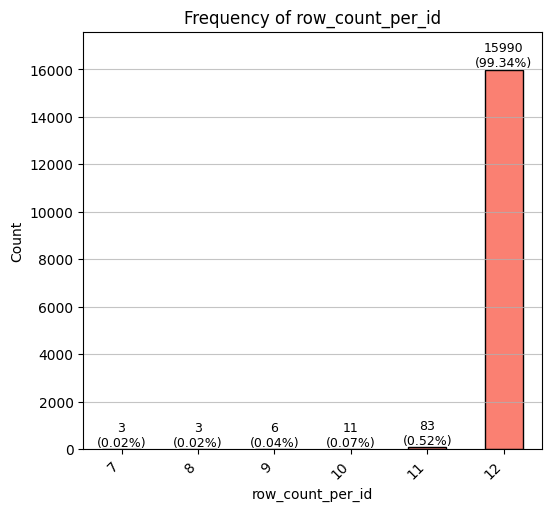

In [63]:
row_counts = price_df.groupby('id').size().reset_index(name='row_count_per_id')

plot_bar_charts(row_counts, ['row_count_per_id'])

We are going to impute these missing values, but let's first check out the correlation matrix between the numeric variables:

`!pip install seaborn --upgrade` in order for the annotation to be correctly seen! Put `requirements.txt` in GitHub repo!

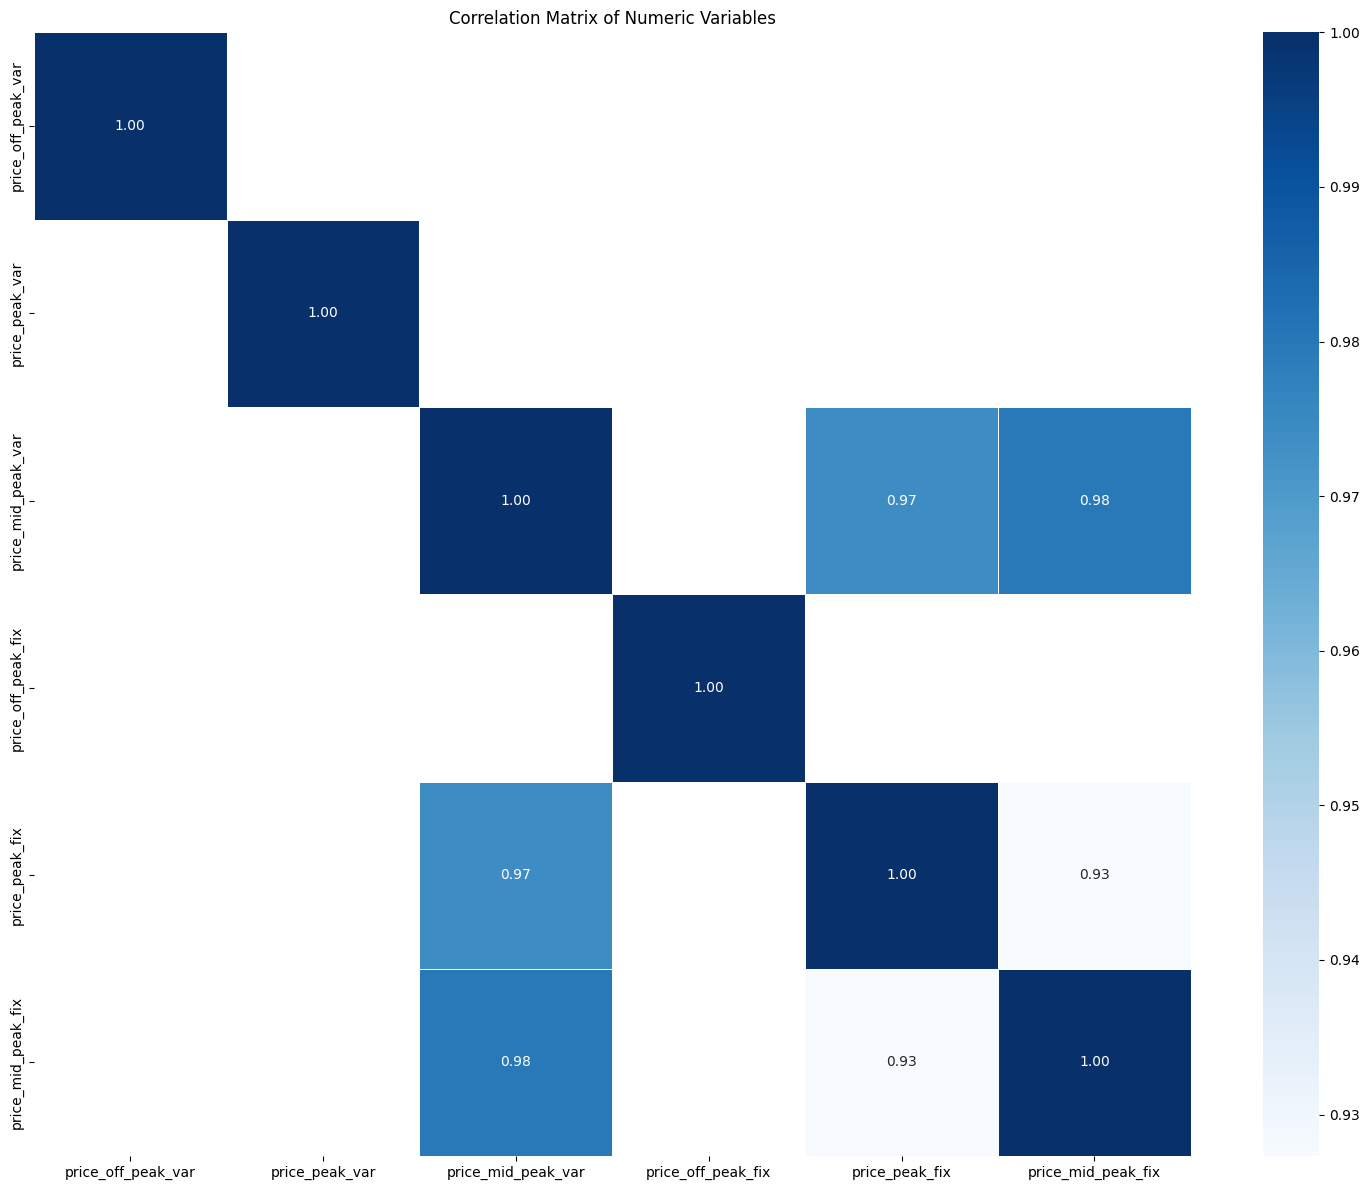

,variable_1,variable_2,correlation
10,price_mid_peak_var,price_peak_fix,0.973960
11,price_mid_peak_var,price_mid_peak_fix,0.979717
14,price_peak_fix,price_mid_peak_fix,0.927308


In [64]:
price_numeric_cols = price_df.select_dtypes(include='number').columns

plot_correlation_matrix(price_df, price_numeric_cols)

As you can see, there are 3 variables very highly correlated among each other: `price_mid_peak_var`, `price_peak_fix`, and `price_mid_peak_fix`. Since this means that they almost carry the same kind of information, I'll consider only one of the 3, i.e. `price_mid_peak_var`, from now on.

In [65]:
price_df.drop(['price_peak_fix', 'price_mid_peak_fix'], axis=1, inplace=True)

Let's now plot the trends for the remaining price variables, by plotting both the average trend and the individual trends for a randomly chosen sample of 50 IDs:

First of all, the number of rows in this case is much higher, and the reason is that for each customer we have more than 1 observation:

/workspaces/myfolder/energy-churn-prediction/utils.py:242: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


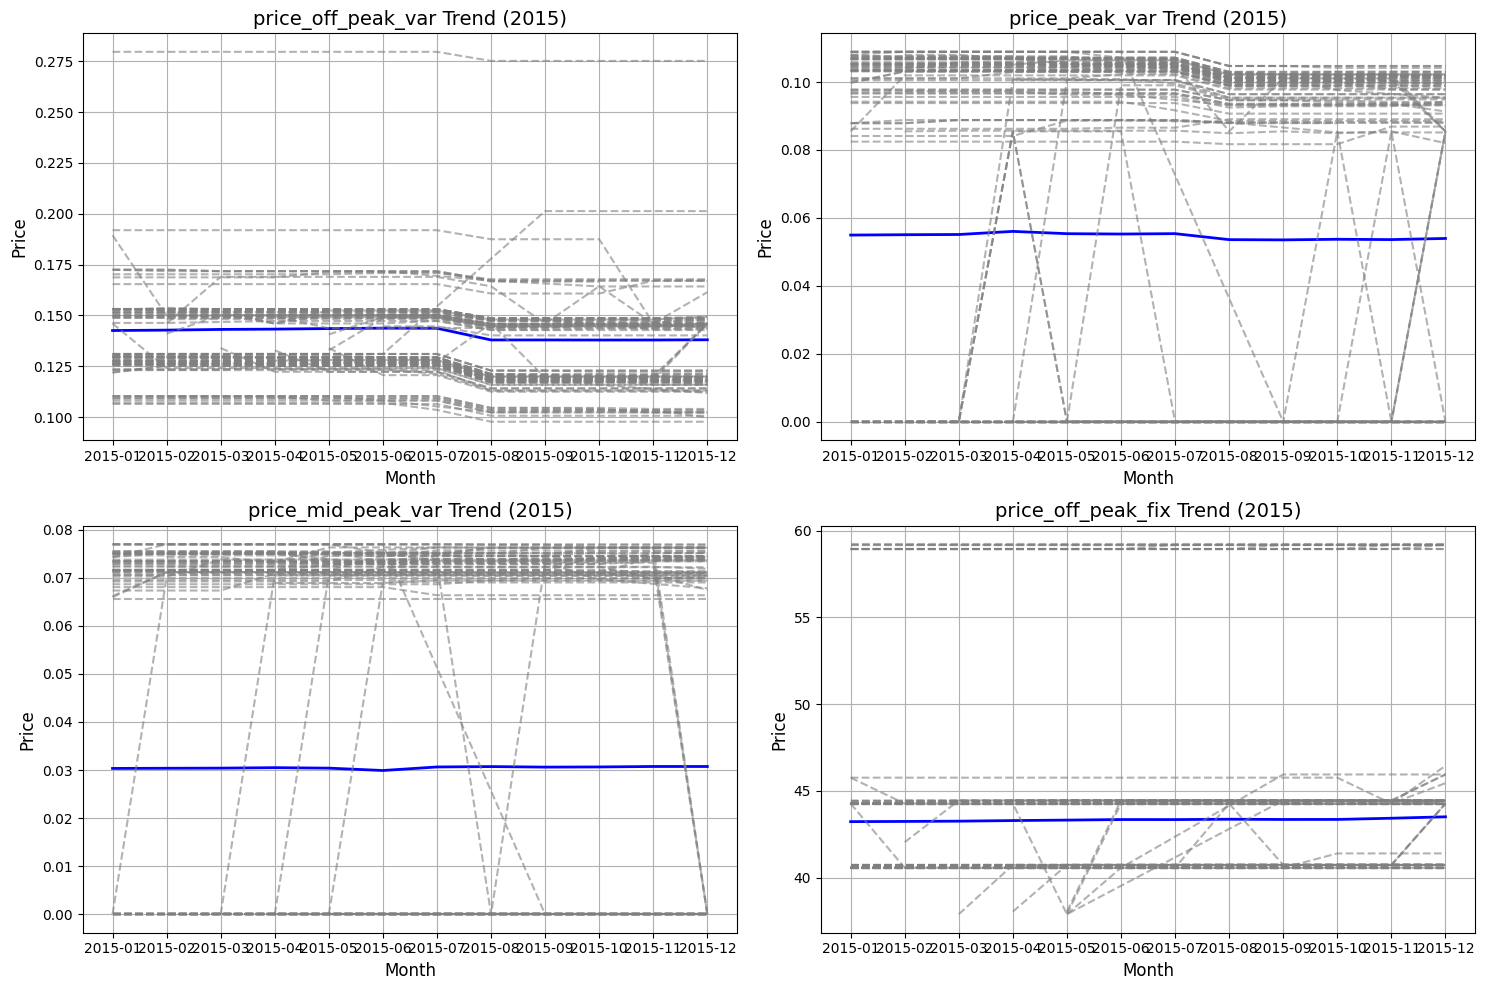

In [66]:
plot_price_trends(price_df, price_numeric_cols, price_date_col, 'id', n_sample=100)

As you can see, while many of the individual trends seem to be represented by an almost constant line, there are some trends containing some spikes or troughs. Therefore, when building price features from these variables, we will also build some features that encapsulate these irregularities in the trends. 

In [67]:
price_cols = [col for col in price_numeric_cols if col in price_df.columns]
price_df = price_df.sort_values(by=['id', price_date_col])

# Group by 'id'
grouped_df = price_df[['id']+price_cols].groupby('id')

# Compute statistics
mean_df = grouped_df.mean()
min_df = grouped_df.min()
max_df = grouped_df.max()
std_df = grouped_df.std()
max_diff_df = grouped_df.agg(lambda x: max(x.iloc[i+1] - x.iloc[i] for i in range(len(x)-1)))

# Rename columns for clarity
mean_df.columns = [f"{col}_mean" for col in price_cols]
min_df.columns = [f"{col}_min" for col in price_cols]
max_df.columns = [f"{col}_max" for col in price_cols]
std_df.columns = [f"{col}_std" for col in price_cols]
max_diff_df.columns = [f"{col}_max_diff" for col in price_cols]

# Join all DataFrames on 'id'
price_summary_df = pd.concat([mean_df, min_df, max_df, std_df, max_diff_df], axis=1)

# Reset index for a cleaner DataFrame if needed
price_summary_df.reset_index(inplace=True)

price_summary_df

,id,price_off_peak_var_mean,price_peak_var_mean,price_mid_peak_var_mean,price_off_peak_fix_mean,price_off_peak_var_min,price_peak_var_min,price_mid_peak_var_min,price_off_peak_fix_min,price_off_peak_var_max,...,price_mid_peak_var_max,price_off_peak_fix_max,price_off_peak_var_std,price_peak_var_std,price_mid_peak_var_std,price_off_peak_fix_std,price_off_peak_var_max_diff,price_peak_var_max_diff,price_mid_peak_var_max_diff,price_off_peak_fix_max_diff
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,0.119906,0.101673,0.070232,40.565969,0.128067,...,0.073773,40.728885,0.003976,0.001989,0.001368,6.341481e-02,0.001969,0.001867,0.003541,0.162916
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.143943,0.000000,0.000000,44.266931,0.148405,...,0.000000,44.444710,0.002197,0.000000,0.000000,8.753223e-02,0.000358,0.000000,0.000000,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.150837,0.000000,0.000000,44.444710,0.205742,...,0.000000,45.944710,0.026008,0.000000,0.000000,7.723930e-01,0.052694,0.000000,0.000000,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,0.113068,0.095385,0.068646,40.565969,0.123086,...,0.069463,40.728885,0.005049,0.002580,0.000403,8.507958e-02,0.000000,0.000000,0.000817,0.162912
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.145440,0.000000,0.000000,44.266930,0.149902,...,0.000000,44.266931,0.002202,0.000000,0.000000,5.908392e-07,0.000468,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16091,ffef185810e44254c3a4c6395e6b4d8a,0.138863,0.115125,0.080780,40.896427,0.112488,0.094804,0.068829,40.728885,0.165037,...,0.093881,41.063970,0.026238,0.020548,0.012503,1.749923e-01,0.002317,0.002317,0.002317,0.000000
16092,fffac626da707b1b5ab11e8431a4d0a2,0.147137,0.000000,0.000000,44.311375,0.144363,0.000000,0.000000,44.266930,0.148825,...,0.000000,44.444710,0.002098,0.000000,0.000000,8.040373e-02,0.000684,0.000000,0.000000,0.177780
16093,fffc0cacd305dd51f316424bbb08d1bd,0.153879,0.129497,0.094842,41.160171,0.151399,0.126871,0.091394,41.063970,0.159560,...,0.101037,41.228885,0.003044,0.002447,0.004310,8.491973e-02,0.004084,0.002317,0.002317,0.164916
16094,fffe4f5646aa39c7f97f95ae2679ce64,0.123858,0.103499,0.073735,40.606699,0.118175,0.100491,0.073433,40.565969,0.127566,...,0.074516,40.728885,0.004600,0.002397,0.000471,7.368063e-02,0.000000,0.000000,0.001083,0.162912


Before analyzing the distribution of these numeric variables, let's perform an inner join `price_summary_df` with `client_df`:

In [68]:
# Perform an inner join based on 'id'
merged_df = pd.merge(client_df, price_summary_df, on='id', how='inner')

merged_df

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,price_mid_peak_var_max,price_off_peak_fix_max,price_off_peak_var_std,price_peak_var_std,price_mid_peak_var_std,price_off_peak_fix_std,price_off_peak_var_max_diff,price_peak_var_max_diff,price_mid_peak_var_max_diff,price_off_peak_fix_max_diff
0,24011ae4ebbe3035111d65fa7c15bc57,Channel 1,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.073873,44.266930,0.007829,0.005126,0.020983,1.050136e+00,0.028554,0.000568,0.002337,3.538045
1,d29c2c54acc38ff3c0614d0a653813dd,Channel Missing,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000000,44.444710,0.002212,0.024677,0.000000,8.040385e-02,0.001567,0.085483,0.000000,0.177780
2,764c75f661154dac3a6c254cd082ea7d,Channel 1,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000000,44.444710,0.002396,0.000506,0.000000,8.753223e-02,0.000000,0.001281,0.000000,0.177779
3,bba03439a292a1e166f80264c16191cb,Channel 2,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000000,44.444710,0.002317,0.000000,0.000000,8.040349e-02,0.000000,0.000000,0.000000,0.177779
4,149d57cf92fc41cf94415803a877cb4b,Channel Missing,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.073773,40.728885,0.003847,0.001885,0.001588,7.368135e-02,0.001969,0.001867,0.003541,0.162916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14548,18463073fb097fc0ac5d3e040f356987,Channel 1,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,...,0.000000,44.444710,0.003897,0.000000,0.000000,9.154352e-02,0.000569,0.000000,0.000000,0.177780
14549,d0a6f71671571ed83b2645d23af6de00,Channel 1,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,...,0.070990,59.173468,0.003669,0.001863,0.000128,1.165389e-01,0.000000,0.000000,0.000260,0.236688
14550,10e6828ddd62cbcf687cb74928c4c2d2,Channel 1,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,...,0.073773,40.728885,0.003976,0.001989,0.001368,6.341481e-02,0.001969,0.001867,0.003541,0.162916
14551,1cf20fd6206d7678d5bcafd28c53b4db,Channel 1,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,...,0.000000,44.444710,0.002212,0.024677,0.000000,8.040379e-02,0.001567,0.085483,0.000000,0.177780


#### Analysis of Numeric variables

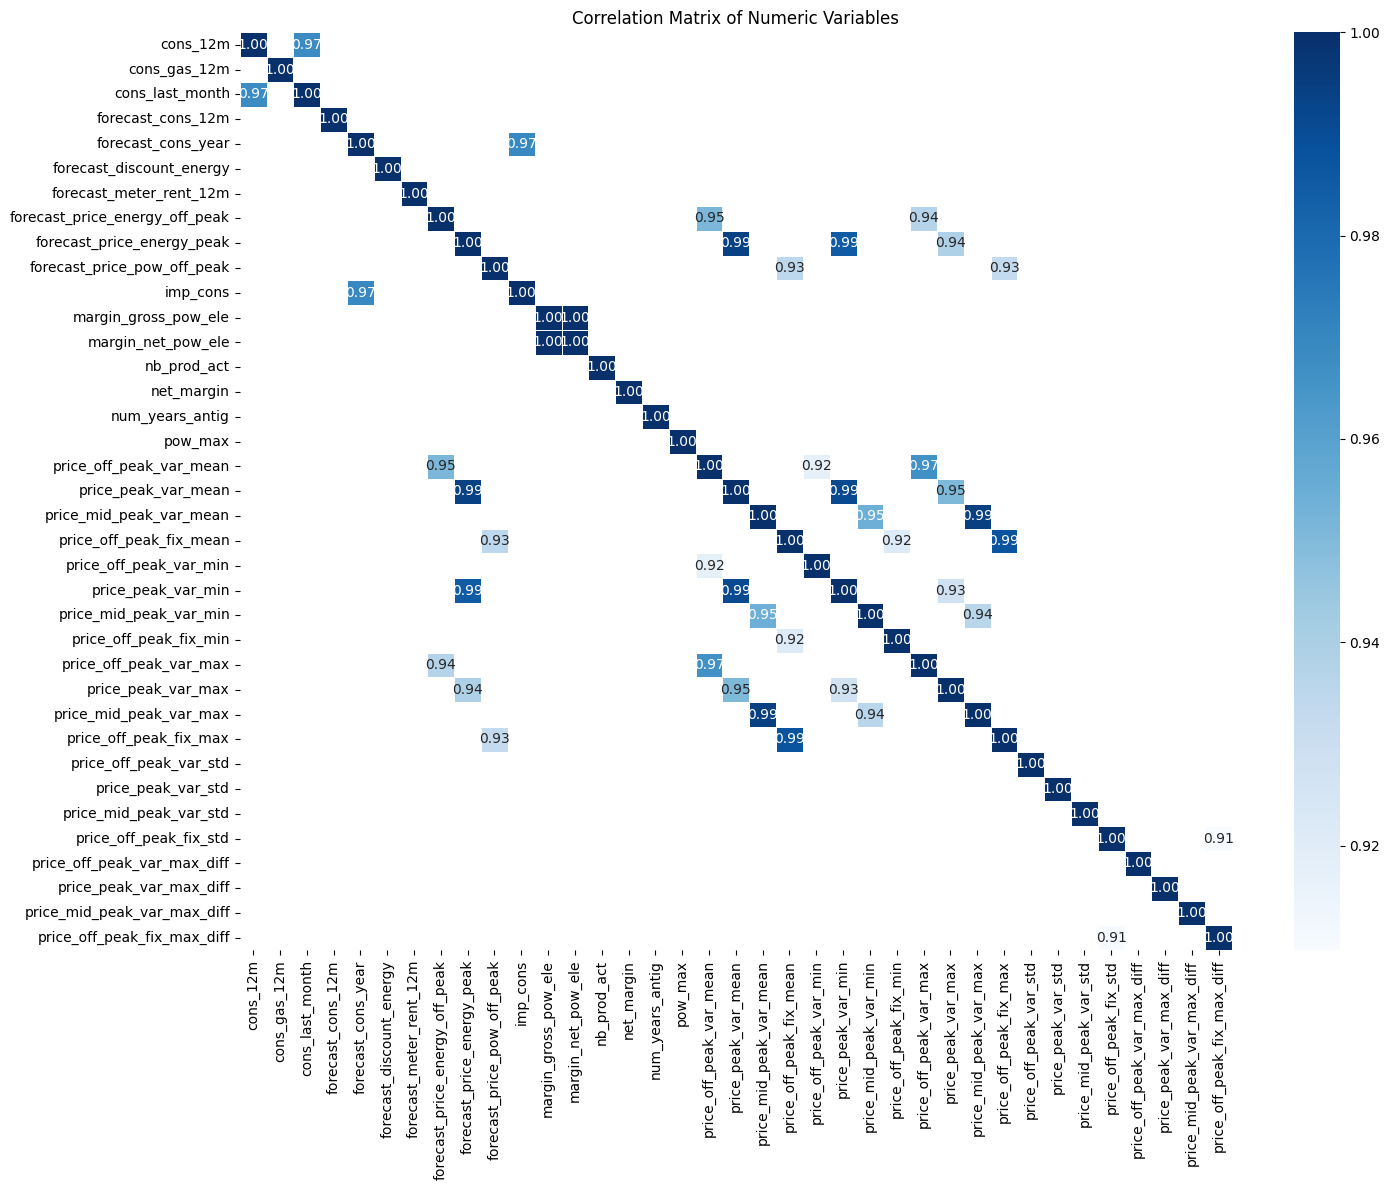

In [69]:
high_corr_pairs = plot_correlation_matrix(merged_df, merged_df.select_dtypes(include='number').columns)

In [70]:
high_corr_pairs.sort_values(by="correlation", ascending=False)

,variable_1,variable_2,correlation
341,margin_gross_pow_ele,margin_net_pow_ele,0.999913
520,price_mid_peak_var_mean,price_mid_peak_var_max,0.994539
269,forecast_price_energy_peak,price_peak_var_mean,0.994026
498,price_peak_var_mean,price_peak_var_min,0.991301
537,price_off_peak_fix_mean,price_off_peak_fix_max,0.987698
273,forecast_price_energy_peak,price_peak_var_min,0.985077
143,forecast_cons_year,imp_cons,0.969393
1,cons_12m,cons_last_month,0.968207
483,price_off_peak_var_mean,price_off_peak_var_max,0.966151
516,price_mid_peak_var_mean,price_mid_peak_var_min,0.954423


For the same reasoning as before, we decide to keep only one variable for each pair of highly correlated variables, i.e. the distinct variables in `variable_2` column:

In [71]:
merged_df.drop(high_corr_pairs['variable_1'].unique(), axis=1, inplace=True)

/workspaces/myfolder/energy-churn-prediction/utils.py:59: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


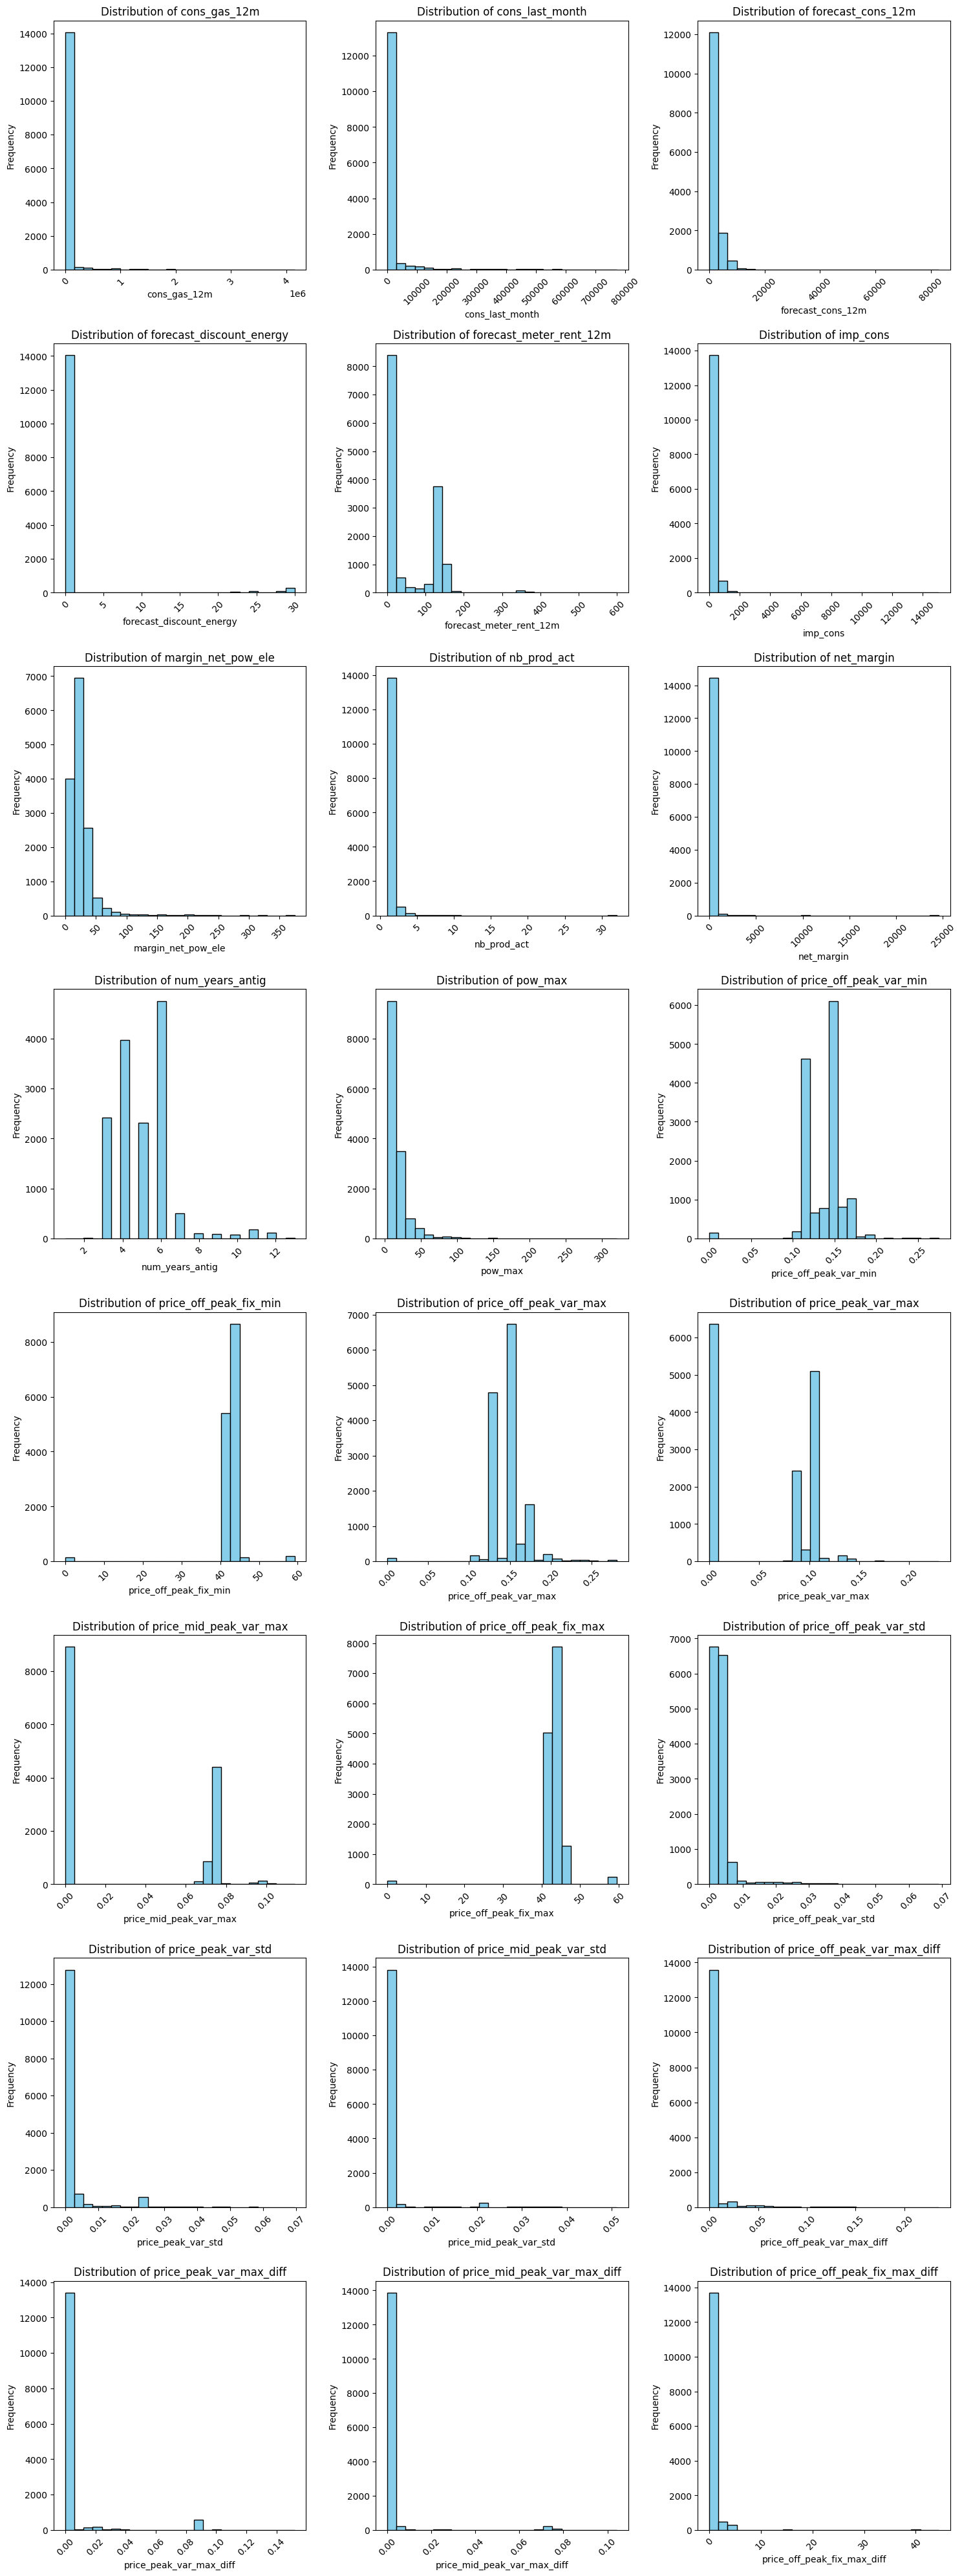

In [72]:
numeric_cols = merged_df.select_dtypes(include='number').columns

plot_numeric_distributions(merged_df, numeric_cols)

As we can see, there are many extremely skewed predictors. This can be problematic because the number of observations available to predict the target varies greatly across the range of the input values. To have a better understanding of the problem, let's first compute skewness, number of 0s, and cardinality for each of the numeric columns: 

In [73]:
num_stats_df = compute_and_sort_statistics(merged_df, numeric_cols, by='cardinality', ascending=True)
num_stats_df

,skewness,zero_counts,cardinality
nb_prod_act,8.645545,0,10
forecast_discount_energy,5.150422,14042,12
num_years_antig,1.447841,0,13
price_off_peak_fix_min,-5.741795,139,30
price_off_peak_fix_max,-5.253426,105,40
price_off_peak_fix_max_diff,15.536750,3174,112
price_mid_peak_var_max,0.487366,8911,206
price_peak_var_max,-0.161977,6365,314
price_off_peak_var_max,-0.458577,20,499
price_off_peak_var_min,-1.681300,65,676


There are 5 variables with less than 50 unique values: `forecast_discount_energy`, `nb_prod_act` and `num_years_antig`, `price_off_peak_fix_min`, and `price_off_peak_fix_max`. Let's plot their value frequencies:

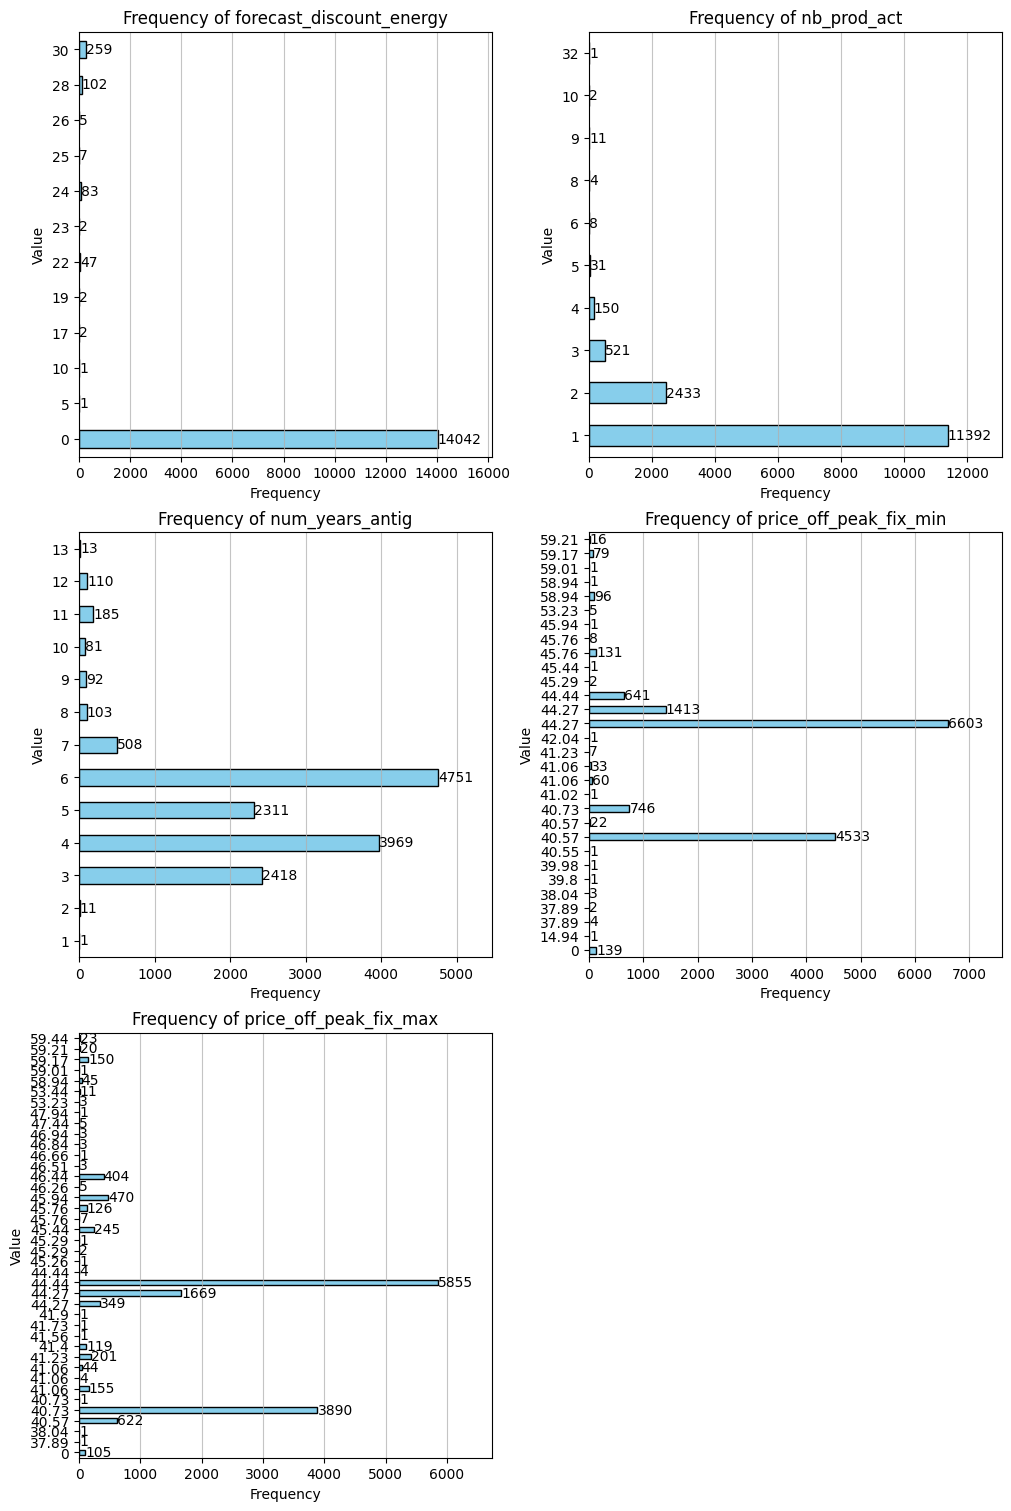

In [74]:
low_cardinality_cols = [col for col in numeric_cols if num_stats_df.loc[col, 'cardinality']<50]

plot_bar_charts(merged_df, low_cardinality_cols, orientation='horizontal')

For these 4 variables, I decided to create the following categorical variables to see if they might be helpful in reducing overfit and generalize better on unseen data:
- `nb_prod_act`: 3 categories: '1', '2' and '3 or more'
- `num_years_antig`: 5 categories: '3 or less', '4', '5', '6' and '7 or more'
- `forecast_discount_energy`: in this case, since less than 4% of the data has a value different than 0, I decided to just create a flag with values '0' and '>0'
- `price_off_peak_fix_min` and `price_off_peak_fix_max`: for these variables, a sensible choice seems to be a split in 3 categories: '0', '>0 and <=42', '>42'

In [75]:
# Transformation for `nb_prod_act`
merged_df['nb_prod_act_cat'] = np.where(merged_df['nb_prod_act'] >= 3, '3 or more',
                                        merged_df['nb_prod_act'].astype(str))

# Transformation for `num_years_antig`
merged_df['num_years_antig_cat'] = np.where(merged_df['num_years_antig'] <= 3, '3 or less',
                                        np.where(merged_df['num_years_antig'] == 4, '4',
                                                np.where(merged_df['num_years_antig'] == 5, '5',
                                                        np.where(merged_df['num_years_antig'] == 6, '6', '7 or more'))))

# Transformation for `forecast_discount_energy`
merged_df['forecast_discount_energy_cat'] = np.where(merged_df['forecast_discount_energy'] > 0, '>0', '0')

# Transformation for `forecast_price_pow_off_peak`, `price_off_peak_fix_min` and `price_off_peak_fix_max`
for col in ['price_off_peak_fix_min', 'price_off_peak_fix_max']:
    merged_df[f'{col}_cat'] = np.where(merged_df[col] == 0, '0',
                                        np.where(merged_df[col] <= 42, '>0 and <=42', '>42'))

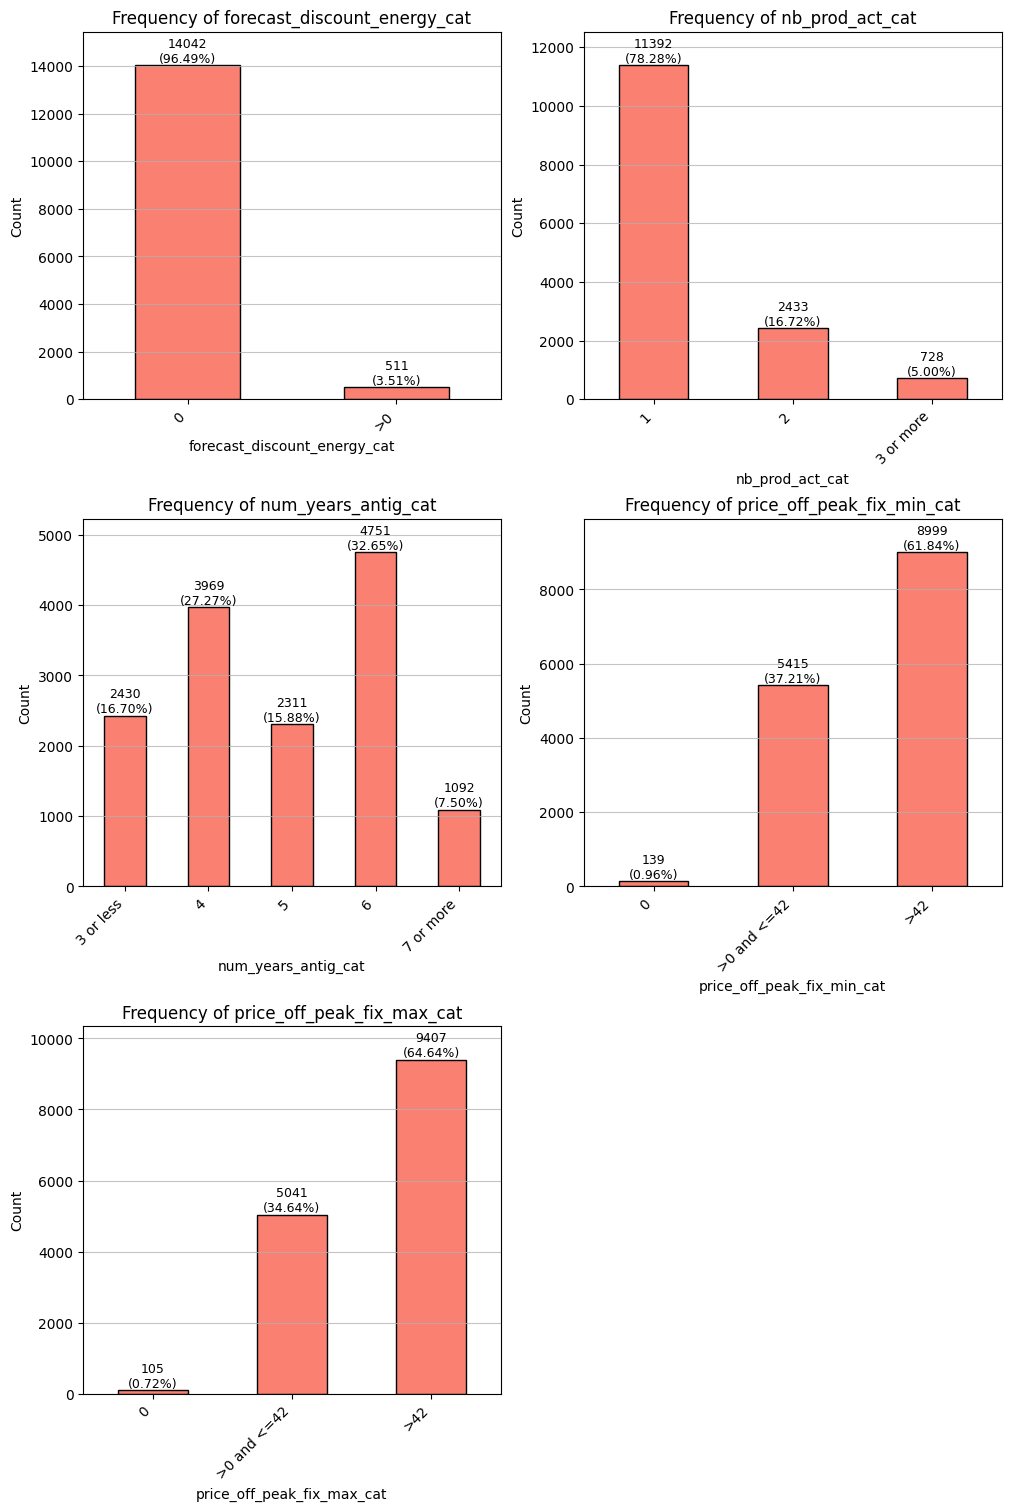

In [76]:
categorized_cols = [f'{col}_cat' for col in low_cardinality_cols]

plot_bar_charts(merged_df, categorized_cols, orientation='vertical')

Let's now focus on the remaining numeric variables:

In [77]:
num_stats_df = num_stats_df[num_stats_df['cardinality']>=50].sort_values(by='zero_counts', ascending=False)
num_stats_df

,skewness,zero_counts,cardinality
cons_gas_12m,9.647826,11994,2063
price_mid_peak_var_max_diff,5.887595,9619,680
price_mid_peak_var_std,5.669184,8983,1895
price_mid_peak_var_max,0.487366,8911,206
price_peak_var_max_diff,4.141079,8238,940
price_peak_var_std,4.311520,6365,2690
price_peak_var_max,-0.161977,6365,314
imp_cons,13.187158,6138,7736
price_off_peak_var_max_diff,6.800589,5345,1365
cons_last_month,6.379240,4956,4743


There are several columns with many rows having value 0. Let's see the distributions of the variables with more than 30% of 0 values when removing all these 0 rows:

Skewness for column cons_gas_12m (excluding zeros): 3.916
---------------------------------
Skewness for column price_mid_peak_var_max_diff (excluding zeros): 3.202
---------------------------------
Skewness for column price_mid_peak_var_std (excluding zeros): 3.351
---------------------------------
Skewness for column price_mid_peak_var_max (excluding zeros): 2.999
---------------------------------
Skewness for column price_peak_var_max_diff (excluding zeros): 2.447
---------------------------------
Skewness for column price_peak_var_std (excluding zeros): 3.237
---------------------------------
Skewness for column price_peak_var_max (excluding zeros): 1.112
---------------------------------
Skewness for column imp_cons (excluding zeros): 11.925
---------------------------------
Skewness for column price_off_peak_var_max_diff (excluding zeros): 5.411
---------------------------------
Skewness for column cons_last_month (excluding zeros): 5.126
---------------------------------


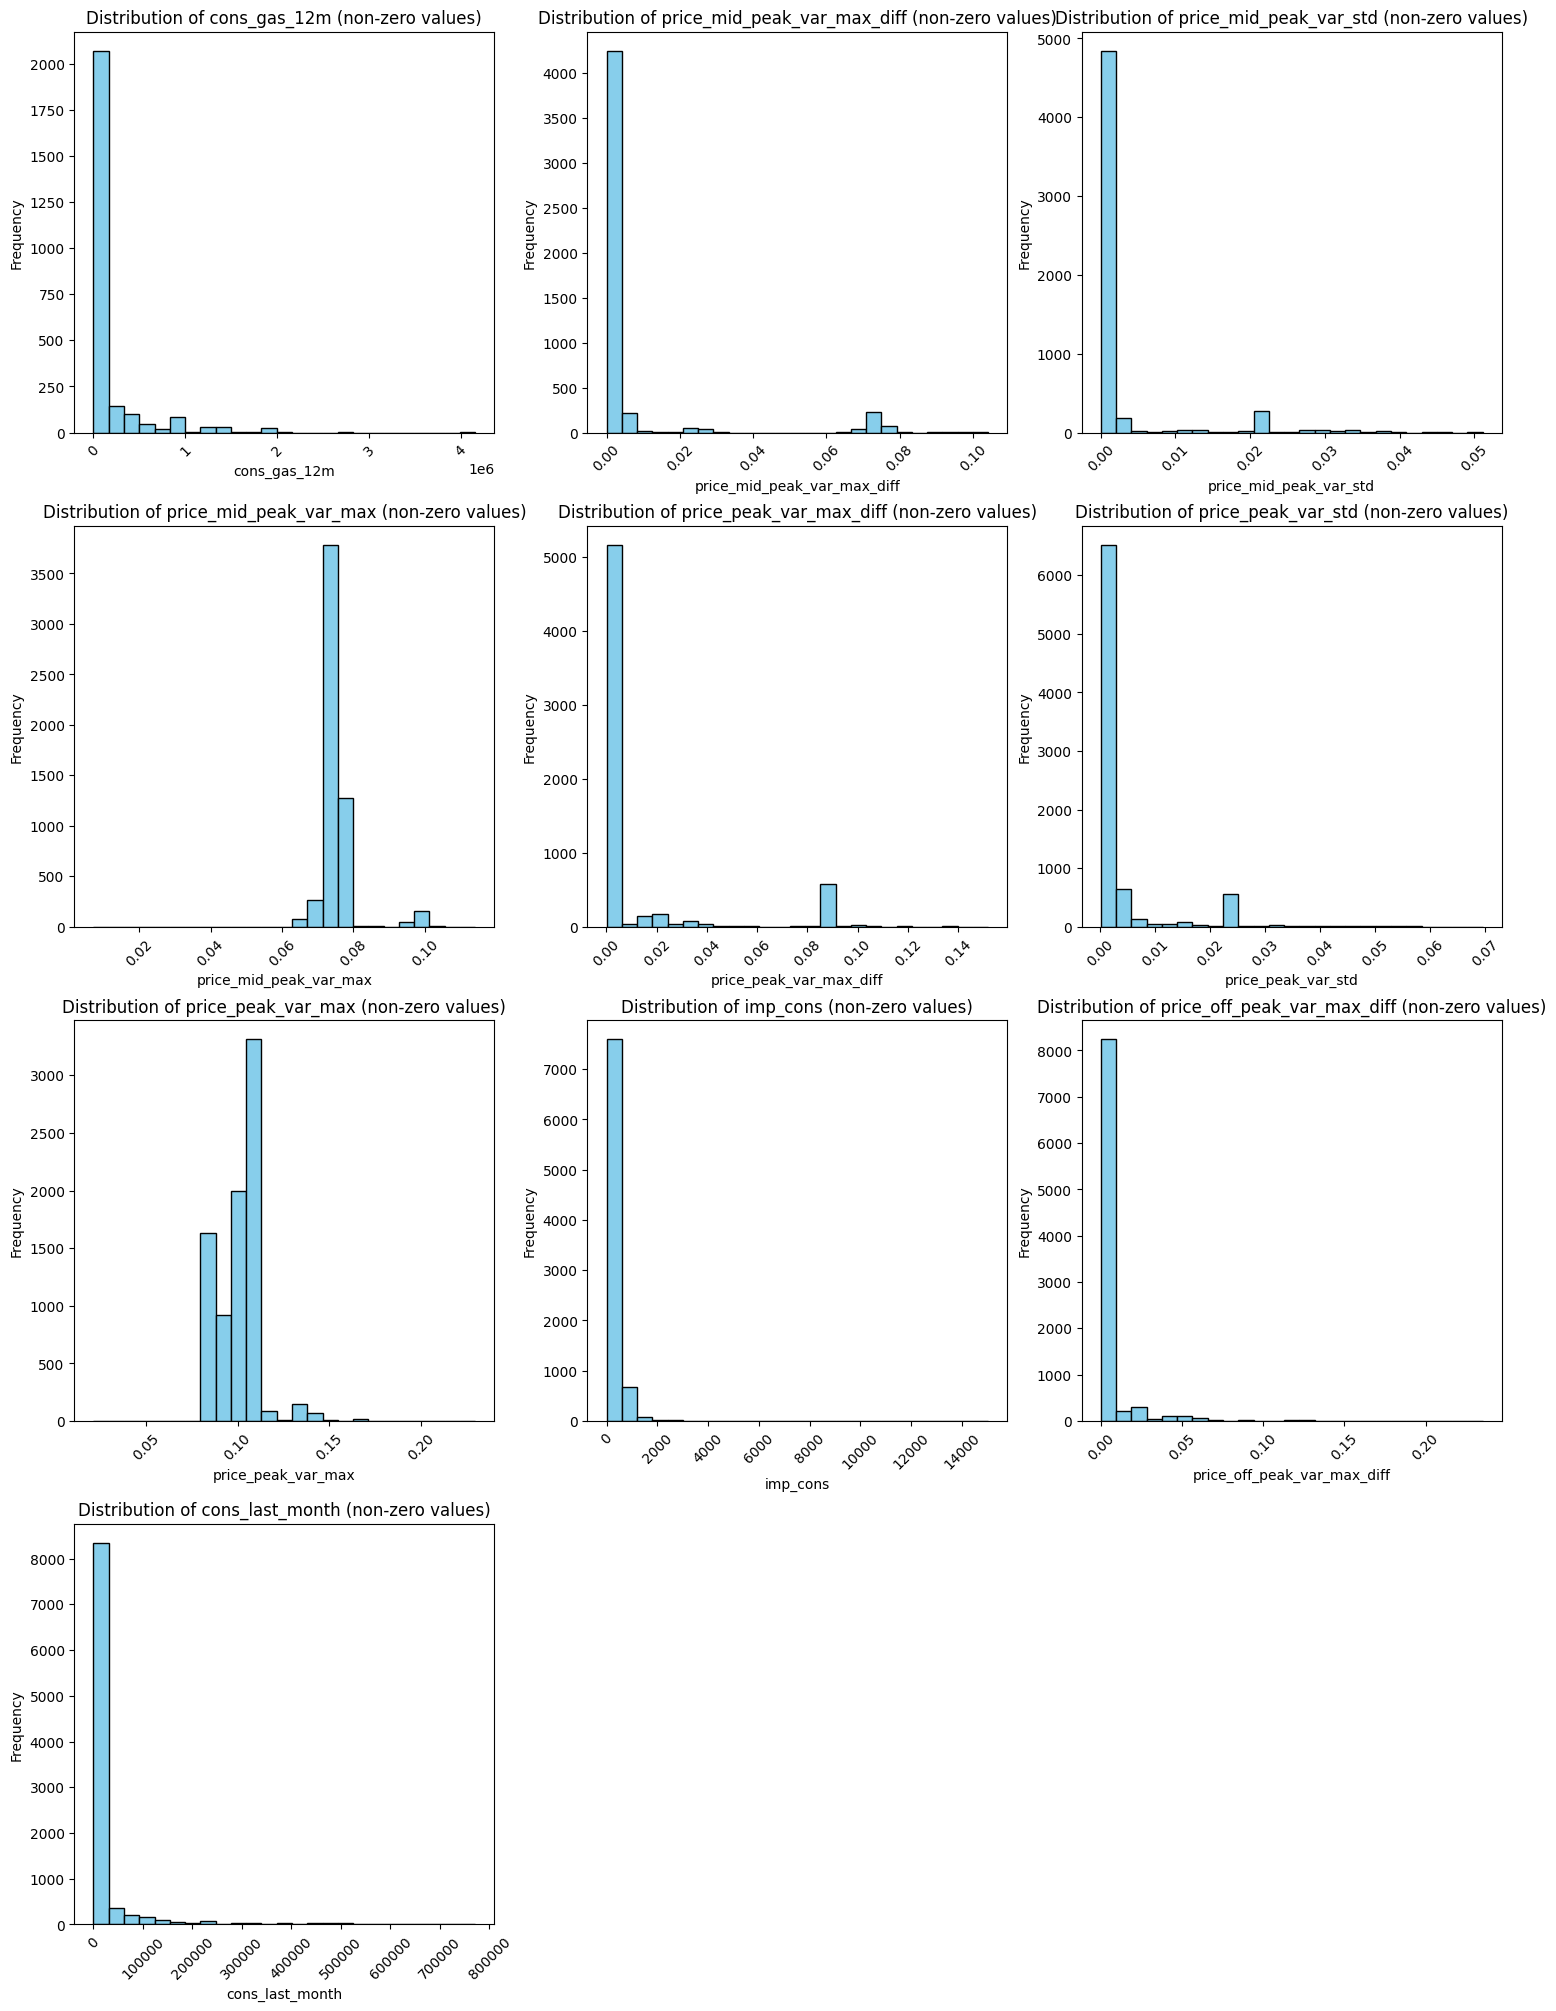

In [78]:
cols_with_high_cardinality = [col for col in num_stats_df.index]

plot_histograms_for_sparse_cols(merged_df, cols_with_high_cardinality, zero_threshold=0.3)

Some of these distributions remain highly skewed even when removing the 0 values. For all these variables, we can consider to build:
- a flag indicator telling whether the variable is in the spike (0 value) or in the distribution (non-zero value).
- perform a log transformation on the values of the distribution (except for the variables whose skewness is less than 3 when removing the 0 rows), and afterwards replacing zero values with the value minimizing the impact on the relationship between the predictor and the response, estimated by the **Point-Biserial correlation coefficient**.

In [79]:
many_zeros_cols = [col for col in num_stats_df.index if num_stats_df.loc[col,'zero_counts']>0.3*len(merged_df)]

merged_df, skewness, distr_transformed_cols = apply_log_transformation_and_impute(merged_df, many_zeros_cols, skewness_threshold=3.0, target='churn')

Original Point-Biserial Correlation for cons_gas_12m_log: -0.056
Best imputation for cons_gas_12m: 7.380695337148769
Point-Biserial Correlation difference: 0.023486526211127318
Original Point-Biserial Correlation for price_mid_peak_var_max_diff_log: 0.013
Best imputation for price_mid_peak_var_max_diff: 0.005008106166395952
Point-Biserial Correlation difference: 0.0008552975761413565
Original Point-Biserial Correlation for price_mid_peak_var_std_log: 0.009
Best imputation for price_mid_peak_var_std: 0.0025380143549958013
Point-Biserial Correlation difference: 7.542293482666954e-05
Original Point-Biserial Correlation for price_mid_peak_var_max_distr: 0.034
Best imputation for price_mid_peak_var_max: 0.07307505050505046
Point-Biserial Correlation difference: 0.002017047216577292
Original Point-Biserial Correlation for price_peak_var_max_diff_distr: 0.007
Best imputation for price_peak_var_max_diff: 0.006191646464646367
Point-Biserial Correlation difference: 1.4293665267360589e-05
Origina

Skewness for column cons_gas_12m_log: 2.732
---------------------------------
Skewness for column price_mid_peak_var_max_diff_log: 5.874
---------------------------------
Skewness for column price_mid_peak_var_std_log: 5.592
---------------------------------
Skewness for column price_mid_peak_var_max_distr: 5.202
---------------------------------
Skewness for column price_peak_var_max_diff_distr: 4.119
---------------------------------
Skewness for column price_peak_var_std_log: 4.444
---------------------------------
Skewness for column price_peak_var_max_distr: 1.908
---------------------------------
Skewness for column imp_cons_log: -0.510
---------------------------------
Skewness for column price_off_peak_var_max_diff_log: 6.560
---------------------------------
Skewness for column cons_last_month_log: 0.163
---------------------------------


/workspaces/myfolder/energy-churn-prediction/utils.py:59: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


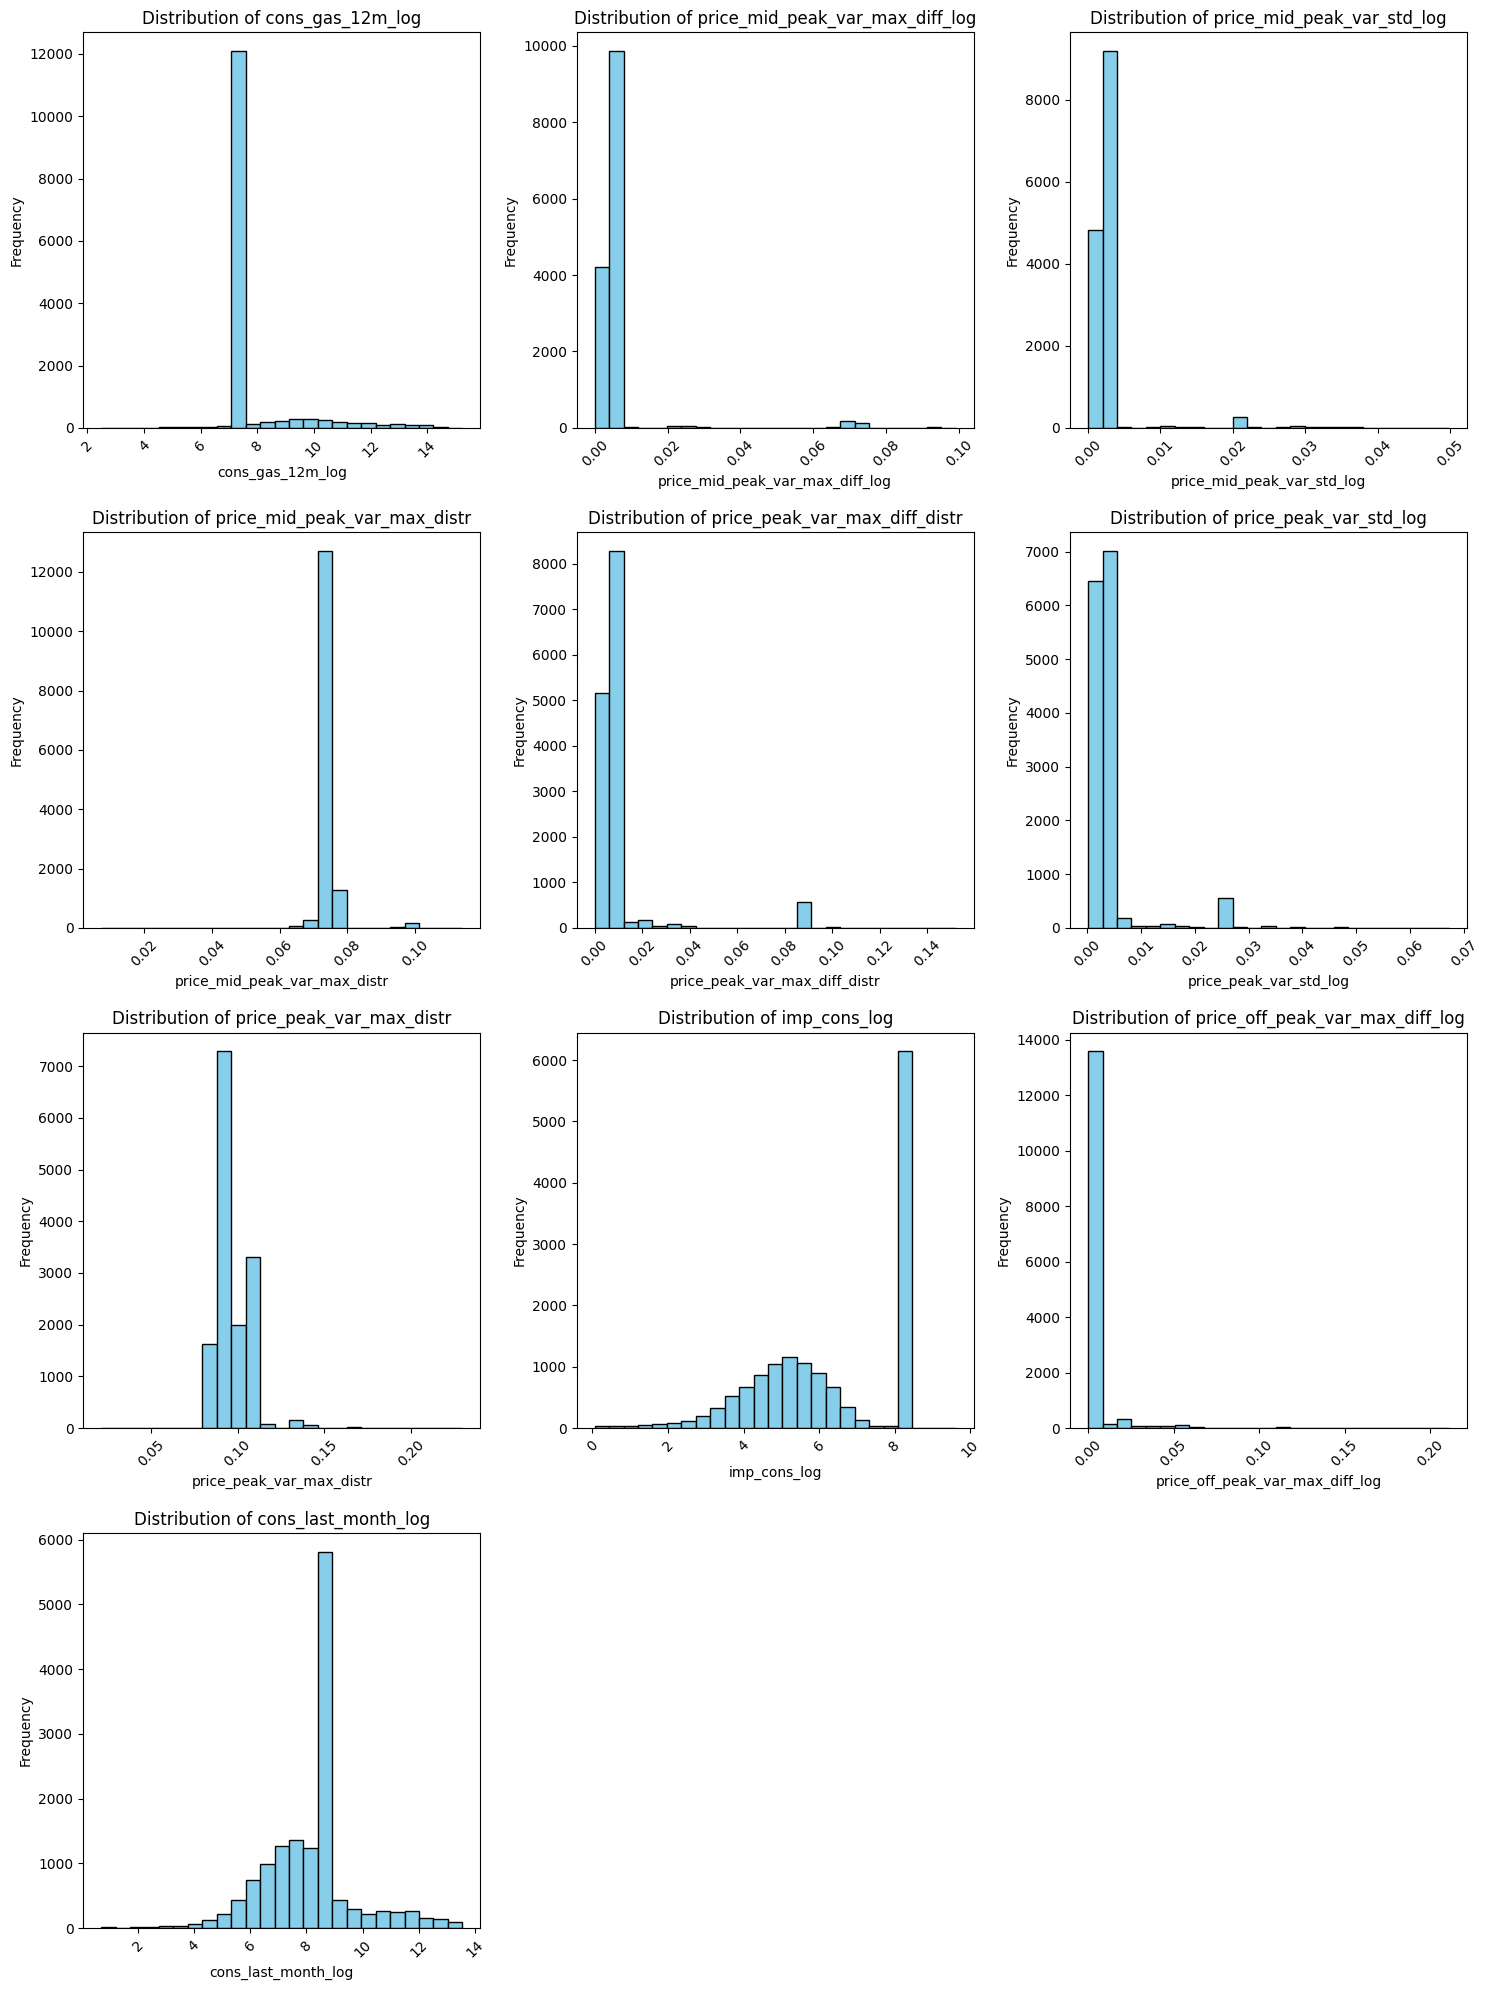

In [80]:
for i, col in enumerate(distr_transformed_cols):
    col_skewness = merged_df[col].skew()
    print(f'Skewness for column {col}: {col_skewness:.3f}')
    print('---------------------------------')

plot_numeric_distributions(merged_df, distr_transformed_cols)

In [81]:
num_stats_df = num_stats_df[num_stats_df['zero_counts']<=0.3*len(merged_df)].sort_values(by='skewness', ascending=False)
num_stats_df

,skewness,zero_counts,cardinality
net_margin,36.532338,184,11934
price_off_peak_fix_max_diff,15.536750,3174,112
forecast_cons_12m,7.150192,305,13945
price_off_peak_var_std,6.460185,100,4658
pow_max,5.782138,0,697
margin_net_pow_ele,4.468047,157,2385
forecast_meter_rent_12m,1.506613,723,3517
price_off_peak_var_max,-0.458577,20,499
price_off_peak_var_min,-1.681300,65,676


Finally, I decided to perform a log transformation on all of the remaining variables whose skewness is greater than 3:

In [82]:
# Identify columns with skewness greater than 4
cols_to_transform = [col for col in num_stats_df.index if num_stats_df.loc[col,'skewness']>3]
transformed_cols = [f"{col}_log" for col in cols_to_transform]

# Apply log transformation to these columns
merged_df[transformed_cols] = merged_df[cols_to_transform].apply(lambda x: np.log1p(x))

# Print the transformed columns
print(f"Transformed columns: {cols_to_transform}")

Transformed columns: ['net_margin', 'price_off_peak_fix_max_diff', 'forecast_cons_12m', 'price_off_peak_var_std', 'pow_max', 'margin_net_pow_ele']


Skewness for column net_margin_log: -0.966
---------------------------------
Skewness for column price_off_peak_fix_max_diff_log: 3.745
---------------------------------
Skewness for column forecast_cons_12m_log: -2.033
---------------------------------
Skewness for column price_off_peak_var_std_log: 6.367
---------------------------------
Skewness for column pow_max_log: 1.804
---------------------------------
Skewness for column margin_net_pow_ele_log: -1.310
---------------------------------


/workspaces/myfolder/energy-churn-prediction/utils.py:59: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


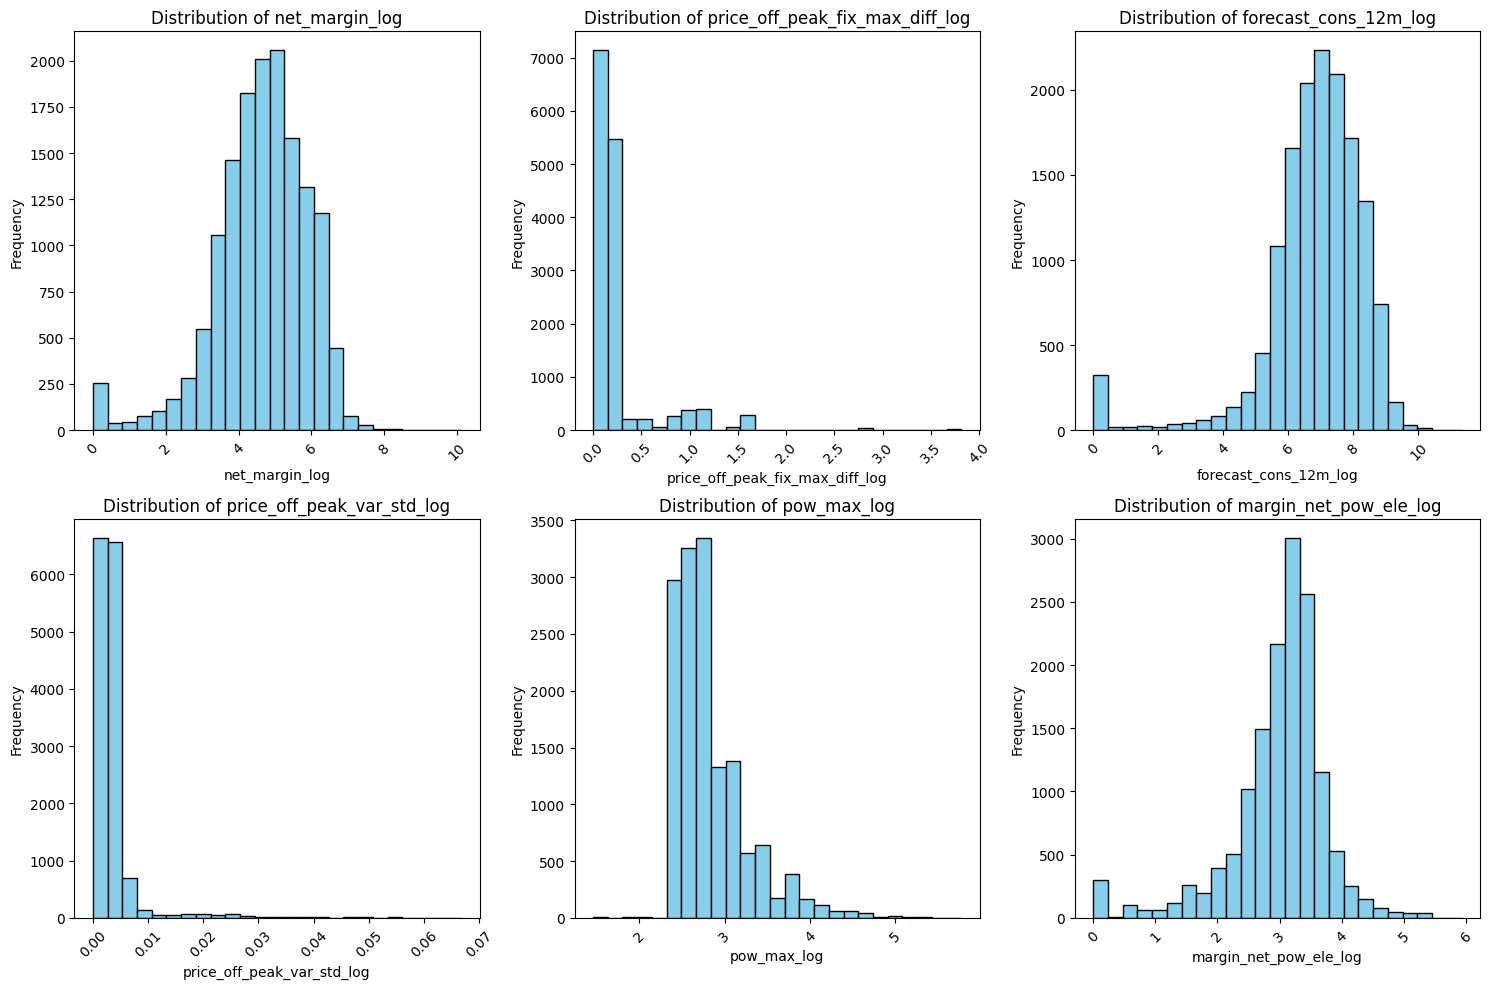

In [83]:
for i, col in enumerate(transformed_cols):
    col_skewness = merged_df[col].skew()
    print(f'Skewness for column {col}: {col_skewness:.3f}')
    print('---------------------------------')

plot_numeric_distributions(merged_df, transformed_cols)

Let's now move to the date variables.

#### Date variables

In [84]:
# 2. Create a table with min and max values for each date variable
datetime_cols = merged_df.select_dtypes(include=['datetime']).columns
date_summary = merged_df[datetime_cols].agg(['min', 'max']).transpose()
date_summary.columns = ['Minimum Date', 'Maximum Date']

# Display the results
print("Date Summary Table:")
date_summary

Date Summary Table:


,Minimum Date,Maximum Date
date_activ,2003-05-09,2014-09-01
date_end,2016-01-28,2017-06-13
date_modif_prod,2003-05-09,2016-01-29
date_renewal,2013-06-26,2016-01-28


Before removing the date variables from the dataset, let's create some features out of them:
- `product_modified`: this variable can take value 0 or 1, depending on whether `date_modif_prod` is equal to 0 or greater than 1, respectively
- `days_to_end`: this variable computes the number of days between the end of the historical period (December 31, 2015) and the registered date of the end of the contract

In [85]:
# Compute 'product_modified'
merged_df.loc[:, 'product_modified'] = (merged_df['date_modif_prod'] > merged_df['date_activ']).astype(int)

# Compute 'days_to_end'
historical_end_date = pd.Timestamp('2015-12-31')
merged_df.loc[:, 'days_to_end'] = (merged_df['date_end'] - historical_end_date).dt.days

merged_df[['date_activ', 'date_modif_prod', 'product_modified', 'date_end', 'days_to_end']].head(10)

,date_activ,date_modif_prod,product_modified,date_end,days_to_end
0,2013-06-15,2015-11-01,1,2016-06-15,167
1,2009-08-21,2009-08-21,0,2016-08-30,243
2,2010-04-16,2010-04-16,0,2016-04-16,107
3,2010-03-30,2010-03-30,0,2016-03-30,90
4,2010-01-13,2010-01-13,0,2016-03-07,67
5,2011-12-09,2015-11-01,1,2016-12-09,344
6,2011-12-02,2011-12-02,0,2016-12-02,337
7,2010-04-21,2010-04-21,0,2016-04-21,112
8,2011-09-23,2011-09-23,0,2016-09-23,267
9,2010-05-04,2015-04-29,1,2016-05-04,125


In [86]:
merged_df.drop(datetime_cols, axis=1, inplace=True)

#### Categorical variables

In [87]:
categorical_cols = [col for col in merged_df.select_dtypes(exclude='number').columns if (col!='id') and (col not in categorized_cols)]
categorical_cols

['channel_sales', 'has_gas', 'origin_up', 'churn']

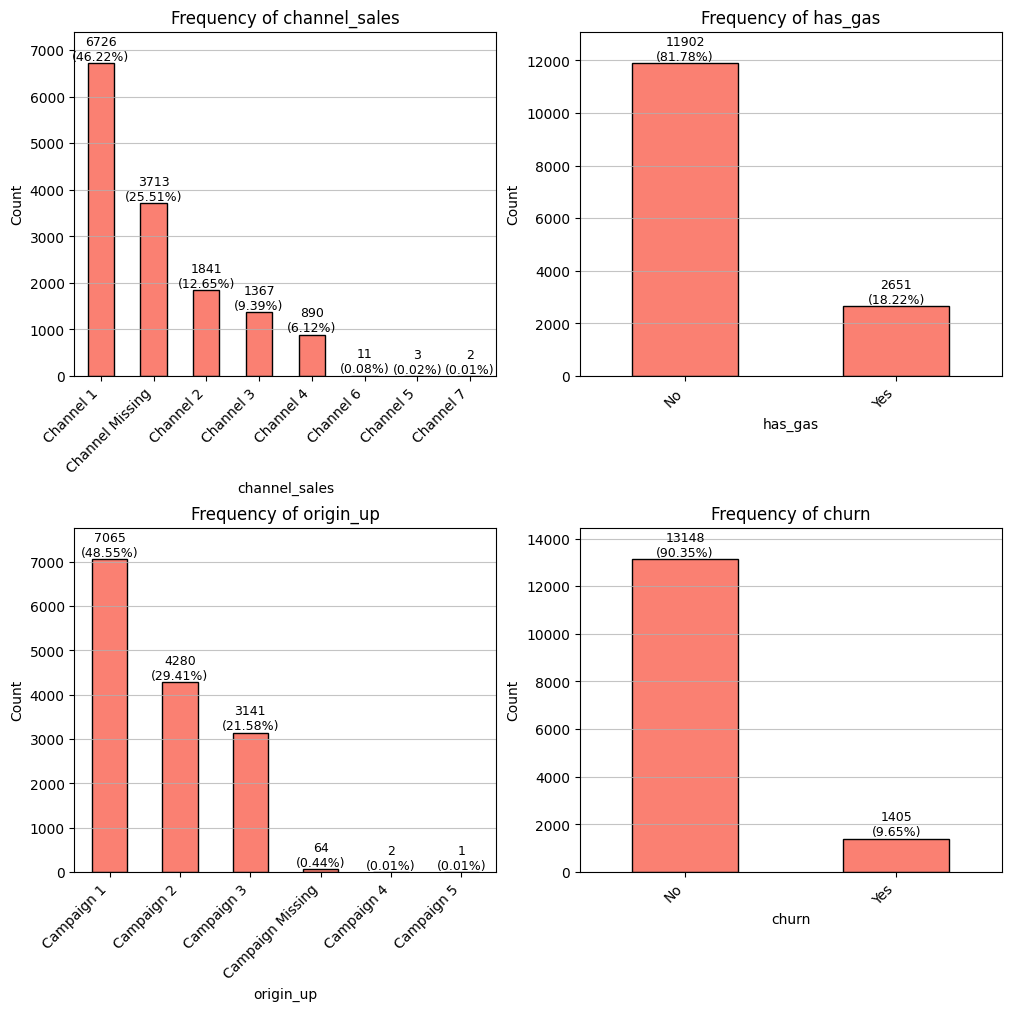

In [88]:
plot_bar_charts(merged_df, categorical_cols, sort_index=False)

As you can see, some categories are very poorly represented:

- `'Channel 5'`, `'Channel 6'` and `'Channel 7'` for the `channel_sales` variable
- `'Campaign 4'`, `'Campaign 5'` and `'Campaign Missing'` for the `origin_up` variable

Since these categories are underrepresented, they are likely to introduce noise into the data without providing enough examples to learn meaningful patterns. Therefore, it has been decided to remove the corresponding rows.

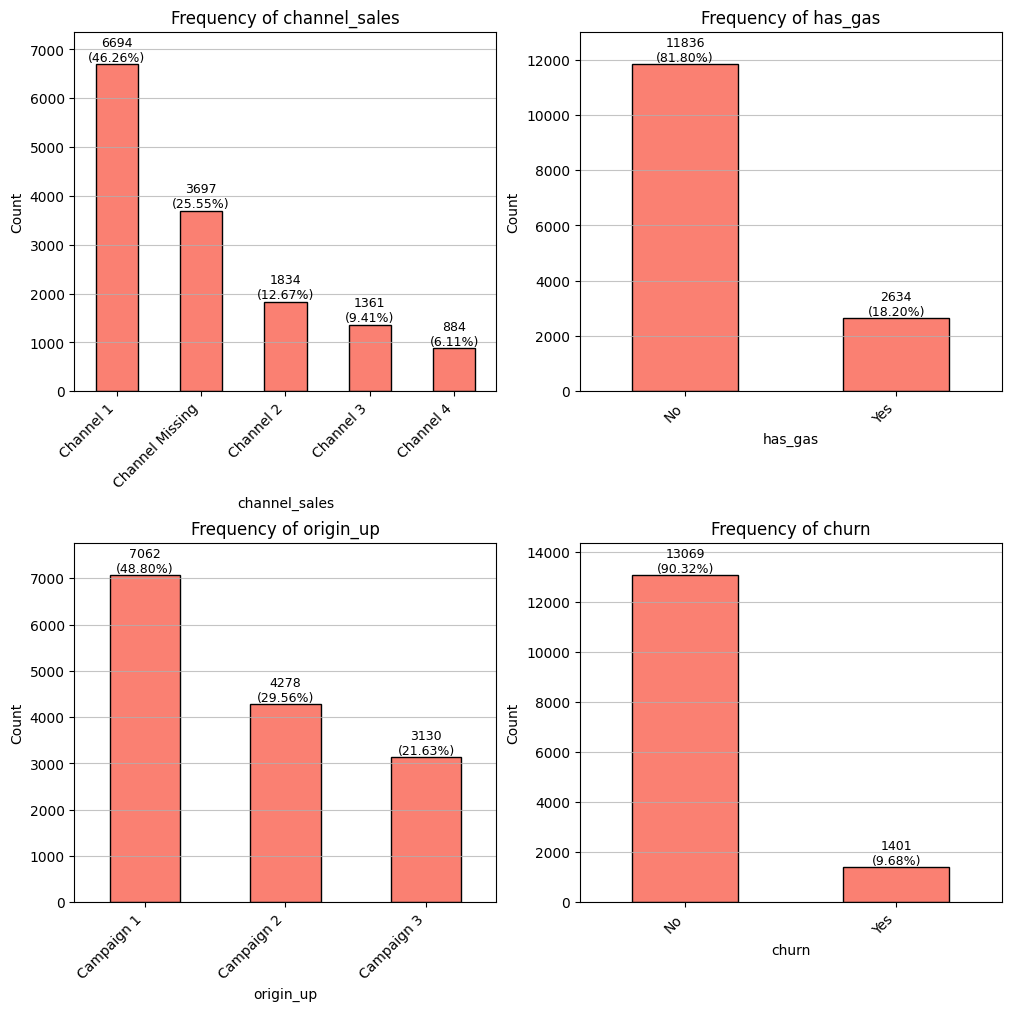

In [89]:
# Define the categories to remove for each column
channel_sales_to_remove = ['Channel 5', 'Channel 6', 'Channel 7']
origin_up_to_remove = ['Campaign 4', 'Campaign 5', 'Campaign Missing']

# Remove the rows with these values
merged_df = merged_df[~merged_df['channel_sales'].isin(channel_sales_to_remove) & ~merged_df['origin_up'].isin(origin_up_to_remove)]

plot_bar_charts(merged_df, categorical_cols, sort_index=False)

# RICOMINCIARE DA QUI

## 2. Model Building

In [120]:
target = 'churn'

X = merged_df.drop(['id', target], axis=1)
y = merged_df[target]

In [145]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [146]:
y_train.value_counts(), y_test.value_counts()

(churn
 No     10455
 Yes     1121
 Name: count, dtype: int64,
 churn
 No     2614
 Yes     280
 Name: count, dtype: int64)

In [121]:
cat_cols = X.select_dtypes(exclude='number')
numeric_cols = X.select_dtypes(include='number')

cat_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14470 entries, 0 to 14469
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   channel_sales                    14470 non-null  object
 1   has_gas                          14470 non-null  object
 2   origin_up                        14470 non-null  object
 3   nb_prod_act_cat                  14470 non-null  object
 4   num_years_antig_cat              14470 non-null  object
 5   forecast_discount_energy_cat     14470 non-null  object
 6   forecast_price_pow_off_peak_cat  14470 non-null  object
 7   price_off_peak_fix_min_cat       14470 non-null  object
 8   price_off_peak_fix_max_cat       14470 non-null  object
dtypes: object(9)
memory usage: 1017.6+ KB


In [128]:
cat_cols_with_two_values = [col for col in cat_cols if merged_df[col].nunique() == 2]
cat_cols_with_more_values = [col for col in cat_cols if merged_df[col].nunique() > 2]

for col in cols_with_two_values:
    print(merged_df[col].value_counts())
    print('---------------------------')

has_gas
No     11836
Yes     2634
Name: count, dtype: int64
---------------------------
forecast_discount_energy_cat
0     13963
>0      507
Name: count, dtype: int64
---------------------------


In [129]:
from sasviya.ml.tree import ForestClassifier

sas_rf = ForestClassifier()

In [144]:
sas_rf.fit(X_train, y_train, nominals=cat_cols)

ForestClassifier()

In [131]:
import sklearn
print(sklearn.__version__)

1.5.2


`!pip install scikit-learn --upgrade` in order not to convert class variables to one-hot encoding (I hope). I need to convert them!

In [133]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ('binary', OrdinalEncoder(categories=[['No', 'Yes'], ['0','>0']]), cat_cols_with_two_values),
        ('ohe', OneHotEncoder(dtype='int64', handle_unknown='ignore', sparse_output=False), cat_cols_with_more_values)
    ],
    remainder='passthrough',  # Keep the remaining columns as they are
    force_int_remainder_cols=False
)

rf = RandomForestClassifier()

# Define the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', rf)
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('binary',
                                                  OrdinalEncoder(categories=[['No',
                                                                              'Yes'],
                                                                             ['0',
                                                                              '>0']]),
                                                  ['has_gas',
                                                   'forecast_discount_energy_cat']),
                                                 ('ohe',
                                                  OneHotEncoder(dtype='int64',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['channel_sales', 'origin_up',
                                                   'nb_prod_act_cat',
                                                   'num_years_antig_cat',
                                                   'forecast_price_pow_off_peak_cat',
                                                   'price_off_peak_fix_min_cat',
                                                   'price_off_peak_fix_max_cat'])])),
                ('classifier', RandomForestClassifier())])

In [147]:
from sklearn.metrics import roc_auc_score

# Make predictions with the SAS Random Forest model (sas_rf)
y_pred_sas_rf = np.array(sas_rf.predict_proba(X_test))[:, 1]  # Get the probability for the positive class (class 1)

# Make predictions with the scikit-learn Random Forest model (pipeline)
y_pred_rf = pipeline.predict_proba(X_test)[:, 1]  # Get the probability for the positive class (class 1)

# Calculate AUC for both models
auc_sas_rf = roc_auc_score(y_test, y_pred_sas_rf)
auc_rf = roc_auc_score(y_test, y_pred_rf)

print(f"AUC for SAS Random Forest: {auc_sas_rf:.4f}")
print(f"AUC for scikit-learn Random Forest: {auc_rf:.4f}")

AUC for SAS Random Forest: 0.7791
AUC for scikit-learn Random Forest: 1.0000


# TO DO
- Change orded of previous section:
    1. First, compute price statistics to obtain one row per ID in price_data table 
    2. Then, merge the two tables
    3. Remove highly correlated variables
    4. Don't do the same steps twice but directly on the merged dataset! More convenient and shorter!
- Random Undersampling?
- Train-test split and then potentially cross-validation on train set
- Assessment using AUC
- Organize previous code better